In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap


In [2]:
df = pd.read_csv('data/dataset_filtered.csv')
# list cols in df
df.columns


Index(['lat', 'lon', 'RH2M', 'T2M', 'PS', 'PRECTOTCORR_SUM',
       'ALLSKY_SFC_SW_DWN', 'cld', 'pet'],
      dtype='object')

In [3]:
# using pycaret to train the model
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data=df, target='ALLSKY_SFC_SW_DWN')

,Description,Value
0,Session id,6395
1,Target,ALLSKY_SFC_SW_DWN
2,Target type,Regression
3,Original data shape,"(78437, 9)"
4,Transformed data shape,"(78437, 9)"
5,Transformed train set shape,"(54905, 9)"
6,Transformed test set shape,"(23532, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [6]:
best = s.compare_models(n_select=5)
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:43:03
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


[ExtraTreesRegressor(n_jobs=-1, random_state=6395),
 RandomForestRegressor(n_jobs=-1, random_state=6395),
 DecisionTreeRegressor(random_state=6395),
 LGBMRegressor(random_state=6395),
 GradientBoostingRegressor(random_state=6395)]

In [7]:
s.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [8]:
# Linear Regression Model - lr

lrModel = s.create_model('lr')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:46:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.0681,204.5383,14.3017,0.9391,0.0938,0.0716
1,11.2617,213.4116,14.6086,0.9373,0.0958,0.0728
2,11.3094,213.6853,14.6180,0.9362,0.0966,0.0737
3,11.2906,210.6492,14.5138,0.9374,0.0964,0.0736
4,11.0771,203.4266,14.2628,0.9390,0.0946,0.0718
5,11.1441,208.9326,14.4545,0.9382,0.0961,0.0726
6,11.1299,207.1331,14.3921,0.9380,0.0956,0.0728
7,11.2814,214.7822,14.6554,0.9354,0.0961,0.0727
8,10.9442,203.4187,14.2625,0.9392,0.0927,0.0701


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tunedLrModel = s.tune_model(lrModel)
s.pull()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:05:38
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.0681,204.5383,14.3017,0.9391,0.0938,0.0716
1,11.2617,213.4116,14.6086,0.9373,0.0958,0.0728
2,11.3094,213.6853,14.6180,0.9362,0.0966,0.0737
3,11.2906,210.6492,14.5138,0.9374,0.0964,0.0736
4,11.0771,203.4266,14.2628,0.9390,0.0946,0.0718
5,11.1441,208.9326,14.4545,0.9382,0.0961,0.0726
6,11.1299,207.1331,14.3921,0.9380,0.0956,0.0728
7,11.2814,214.7822,14.6554,0.9354,0.0961,0.0727
8,10.9442,203.4187,14.2625,0.9392,0.0927,0.0701


Fitting 10 folds for each of 2 candidates, totalling 20 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.0681,204.5383,14.3017,0.9391,0.0938,0.0716
1,11.2617,213.4116,14.6086,0.9373,0.0958,0.0728
2,11.3094,213.6853,14.6180,0.9362,0.0966,0.0737
3,11.2906,210.6492,14.5138,0.9374,0.0964,0.0736
4,11.0771,203.4266,14.2628,0.9390,0.0946,0.0718
5,11.1441,208.9326,14.4545,0.9382,0.0961,0.0726
6,11.1299,207.1331,14.3921,0.9380,0.0956,0.0728
7,11.2814,214.7822,14.6554,0.9354,0.0961,0.0727
8,10.9442,203.4187,14.2625,0.9392,0.0927,0.0701


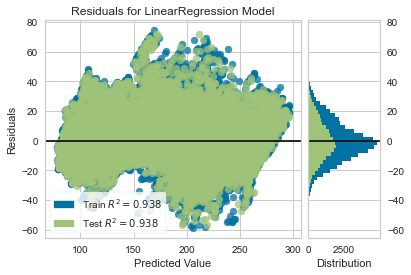

In [21]:
s.plot_model(tunedLrModel, use_t)

In [23]:
lrModel.predict()

LinearRegression(n_jobs=-1)

In [24]:
s.dashboard(lrModel)

ModuleNotFoundError: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

In [ ]:
rfModel = s.create_model('rf')